In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sandbox import (
    kosten_pro_diagnose,
    kosten_pro_eingriff,
    kosten_pro_medikament,
)

pd.set_option("display.max_rows", None)
pd.options.display.float_format = "{:,.2f}".format

# Basics

In [2]:
df = pd.read_csv('data/DATENSATZ_UEAI.csv', delimiter=',')
df.head(10)

,Versnr,Jahr,Ausgaben,Diagnose,Medikament,Eingriff,Gebjahr
0,1,2018,720.08,ICD37,ATC-66,663+OPS,1977
1,1,2018,408.20,ICD97,ATC-00,003+OPS,1977
2,1,2018,85.79,ICD49,ATC-50,503+OPS,1977
3,1,2018,132.53,NaN,ATC-13,NaN,1977
4,2,2018,32.47,ICD04,ATC-32,323+OPS,1939
5,2,2018,546.31,ICD16,ATC-26,263+OPS,1939
6,2,2018,162.32,ICD28,ATC-00,003+OPS,1939
7,2,2018,160.87,NaN,ATC-25,253+OPS,1939
8,2,2019,501.41,ICD10,ATC-21,213+OPS,1939
9,2,2019,236.77,ICD08,ATC-46,463+OPS,1939


In [3]:
df.tail(10)

,Versnr,Jahr,Ausgaben,Diagnose,Medikament,Eingriff,Gebjahr
145062,10000,2019,341.46,ICD04,ATC-37,373+OPS,1965
145063,10000,2019,307.26,ICD27,ATC-31,NaN,1965
145064,10000,2020,138.78,ICD20,ATC-07,073+OPS,1965
145065,10000,2020,187.63,ICD16,ATC-23,233+OPS,1965
145066,10000,2020,289.16,ICD07,ATC-15,153+OPS,1965
145067,10000,2020,268.77,ICD10,NaN,NaN,1965
145068,10000,2021,261.39,ICD20,ATC-18,183+OPS,1965
145069,10000,2021,281.06,ICD09,ATC-11,113+OPS,1965
145070,10000,2021,643.26,ICD23,ATC-84,843+OPS,1965
145071,10000,2021,253.86,ICD26,NaN,NaN,1965


In [4]:
df.sample(10)

,Versnr,Jahr,Ausgaben,Diagnose,Medikament,Eingriff,Gebjahr
37646,2590,2020,331.22,ICD08,ATC-10,103+OPS,1948
139304,9608,2021,763.68,ICD29,ATC-33,333+OPS,1964
97434,6707,2021,576.61,ICD37,ATC-05,053+OPS,1989
119790,8262,2021,127.88,ICD60,ATC-02,023+OPS,1949
126087,8701,2021,542.94,ICD22,ATC-34,343+OPS,1968
68779,4730,2021,259.49,NaN,ATC-27,NaN,1949
9808,675,2021,260.37,ICD05,ATC-25,253+OPS,1958
125495,8662,2019,878.99,ICD19,NaN,NaN,1965
105697,7280,2018,167.31,ICD22,ATC-07,073+OPS,1966
130336,8999,2020,489.81,ICD26,ATC-27,273+OPS,1987


# Statistik

In [5]:
summary_stats = df.describe(include="all").round(2)
summary_stats.loc["nunique"] = df.nunique()  # number of unique values
summary_stats.loc["missing"] = df.isnull().sum()  # number of missing values
summary_stats

,Versnr,Jahr,Ausgaben,Diagnose,Medikament,Eingriff,Gebjahr
count,"145,072.00","145,072.00","145,072.00",130664,127194,115997,"145,072.00"
unique,NaN,NaN,NaN,86,109,109,NaN
top,NaN,NaN,NaN,ICD05,ATC-03,033+OPS,NaN
freq,NaN,NaN,NaN,3222,3102,2819,NaN
mean,"4,997.09","2,019.43",361.92,NaN,NaN,NaN,"1,965.64"
std,"2,888.94",1.13,327.29,NaN,NaN,NaN,12.32
min,1.00,"2,018.00",5.94,NaN,NaN,NaN,"1,919.00"
25%,"2,492.75","2,018.00",161.14,NaN,NaN,NaN,"1,957.00"
50%,"4,990.50","2,019.00",276.26,NaN,NaN,NaN,"1,966.00"
75%,"7,492.00","2,020.00",457.93,NaN,NaN,NaN,"1,974.00"


In [6]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145072 entries, 0 to 145071
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Versnr      145072 non-null  int64  
 1   Jahr        145072 non-null  int64  
 2   Ausgaben    145072 non-null  float64
 3   Diagnose    130664 non-null  object 
 4   Medikament  127194 non-null  object 
 5   Eingriff    115997 non-null  object 
 6   Gebjahr     145072 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 7.7+ MB


In [7]:
# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Versnr            0
Jahr              0
Ausgaben          0
Diagnose      14408
Medikament    17878
Eingriff      29075
Gebjahr           0
dtype: int64


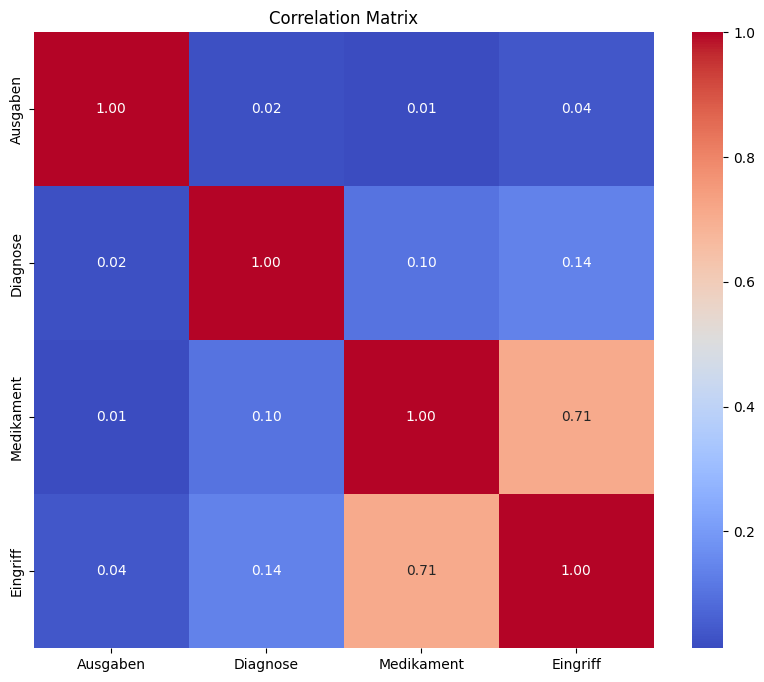

In [8]:
# Select the relevant columns
df_selected = df[["Ausgaben", "Diagnose", "Medikament", "Eingriff"]].copy()

# Convert categorical columns to numerical using factorize
df_selected["Diagnose"] = pd.factorize(df_selected["Diagnose"])[0]
df_selected["Medikament"] = pd.factorize(df_selected["Medikament"])[0]
df_selected["Eingriff"] = pd.factorize(df_selected["Eingriff"])[0]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show();


- Versnr ist der Identifyer
- Das Dataset geht über 4 Jahre
- Die Spalten Diagnosen, Medikament und Eingriff sind Pseudocodes und weisen Lücken auf
- Die Spalten Medikament und Eingriff haben vermutlich Korrelationen
- Die Versicherten scheinen gehobenen Alters zu sein.

# Verteilungen

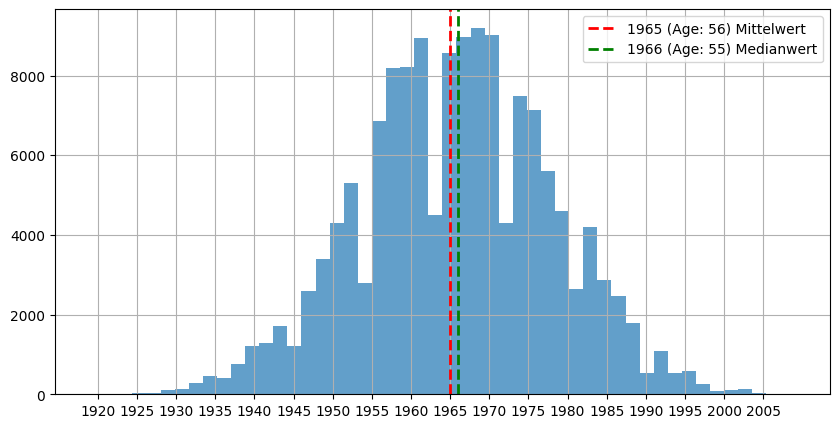

Jahre ohne Versicherten in Datatset: {1920, 1922, 1923, 2006, 2007, 2008}
Hypothese: die frühen Jahrgänge könnten bereits verstoben sein.
Hypothese: die frühen Jahrgänge könnten noch nicht beahndelt oder medikamentiert sein. Stark abhängig von der Auswahl der ICD-10 Codes.


In [9]:
# Histogramm
df["Gebjahr"].hist(figsize=(10, 5), bins=50, alpha=0.7)
mean_value = df["Gebjahr"].mean()
median_value = df["Gebjahr"].median()

# Remove decimal places from mean and median values
mean_value = int(mean_value)
median_value = int(median_value)

# Calculate age in years
current_year = df.Jahr.max() # 2021
mean_age = current_year - mean_value
median_age = current_year - median_value

# Update the plot with age information
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f'{mean_value} (Age: {mean_age}) Mittelwert')
plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2, label=f'{median_value} (Age: {median_age}) Medianwert')
plt.legend()

# Set x-axis ticks in steps of 5 years
plt.xticks(range(df["Gebjahr"].min() + 1, df["Gebjahr"].max() + 1, 5))

plt.show()

df["Gebjahr"].value_counts().sort_index()
missing_years = set(range(df["Gebjahr"].min(), df["Gebjahr"].max())) - set(df["Gebjahr"].unique())
print("Jahre ohne Versicherten in Datatset:", missing_years)
print("Hypothese: die frühen Jahrgänge könnten bereits verstoben sein.")
print("Hypothese: die frühen Jahrgänge könnten noch nicht beahndelt oder medikamentiert sein. Stark abhängig von der Auswahl der ICD-10 Codes.")

# Cleaning

In [10]:
# Entfernen von Sonderzeichen und Buchstaben aus den Spalten Diagnose, Medikament und Eingriff
df['Diagnose'] = df['Diagnose'].str.replace(r'[^0-9]', '', regex=True).fillna("Missing")
df['Medikament'] = df['Medikament'].str.replace(r'[^0-9]', '', regex=True).fillna("Missing")
df['Eingriff'] = df['Eingriff'].str.replace(r'[^0-9]', '', regex=True).fillna("Missing")
df.head()

,Versnr,Jahr,Ausgaben,Diagnose,Medikament,Eingriff,Gebjahr
0,1,2018,720.08,37,66,663,1977
1,1,2018,408.20,97,00,003,1977
2,1,2018,85.79,49,50,503,1977
3,1,2018,132.53,Missing,13,Missing,1977
4,2,2018,32.47,04,32,323,1939


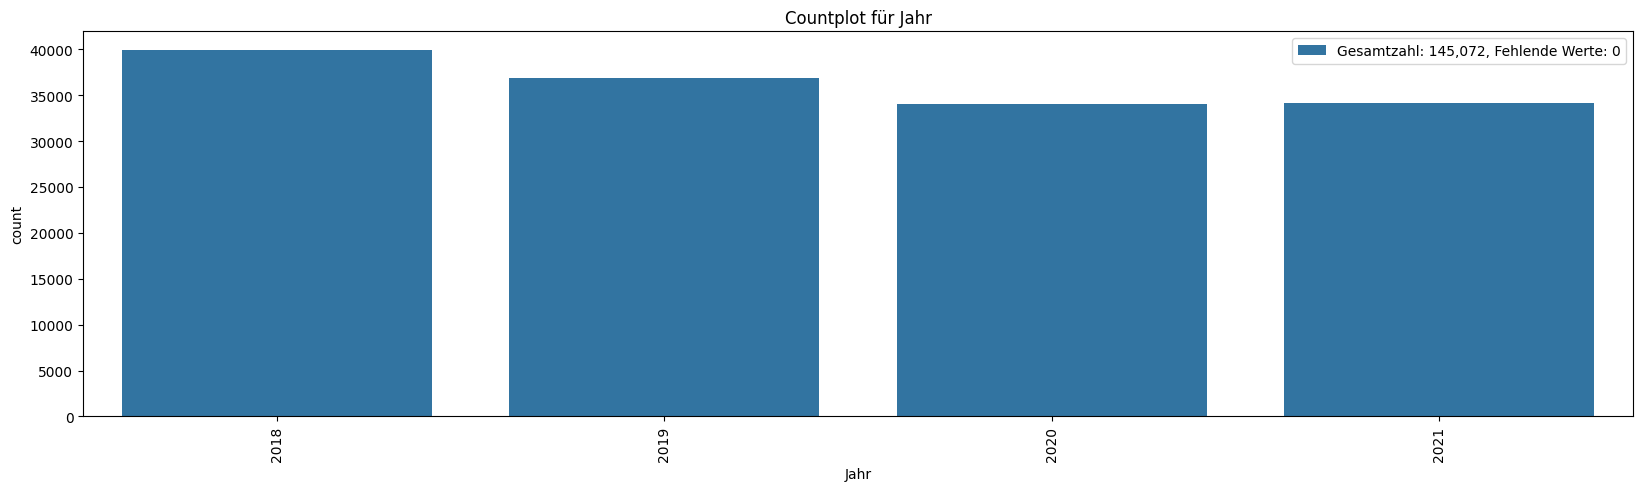

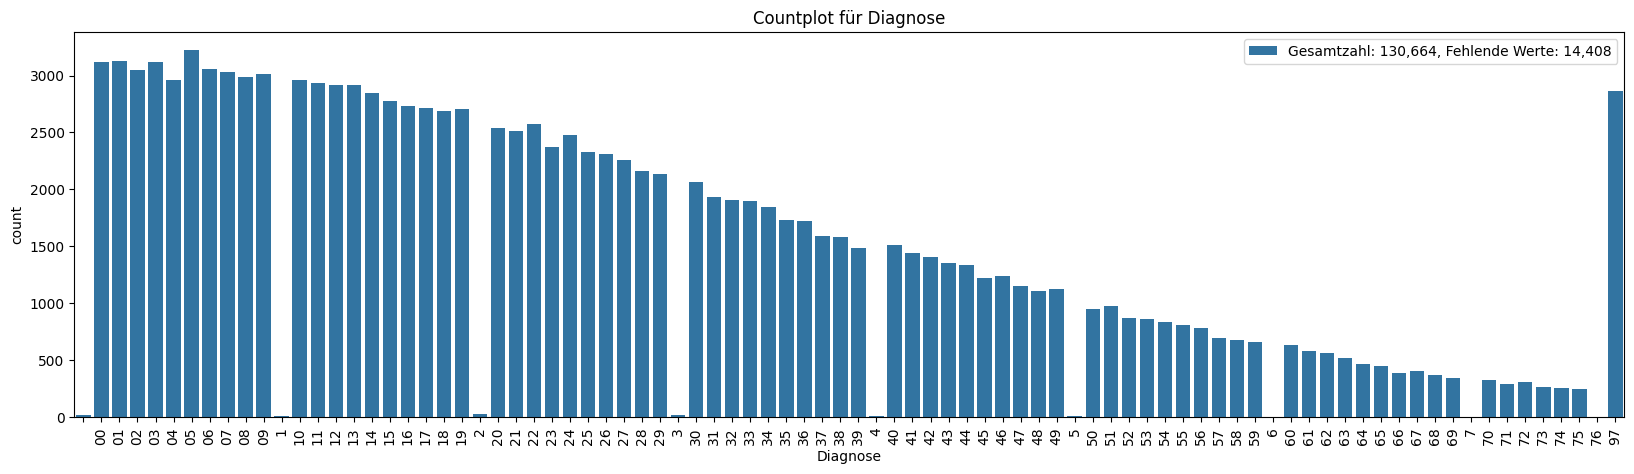

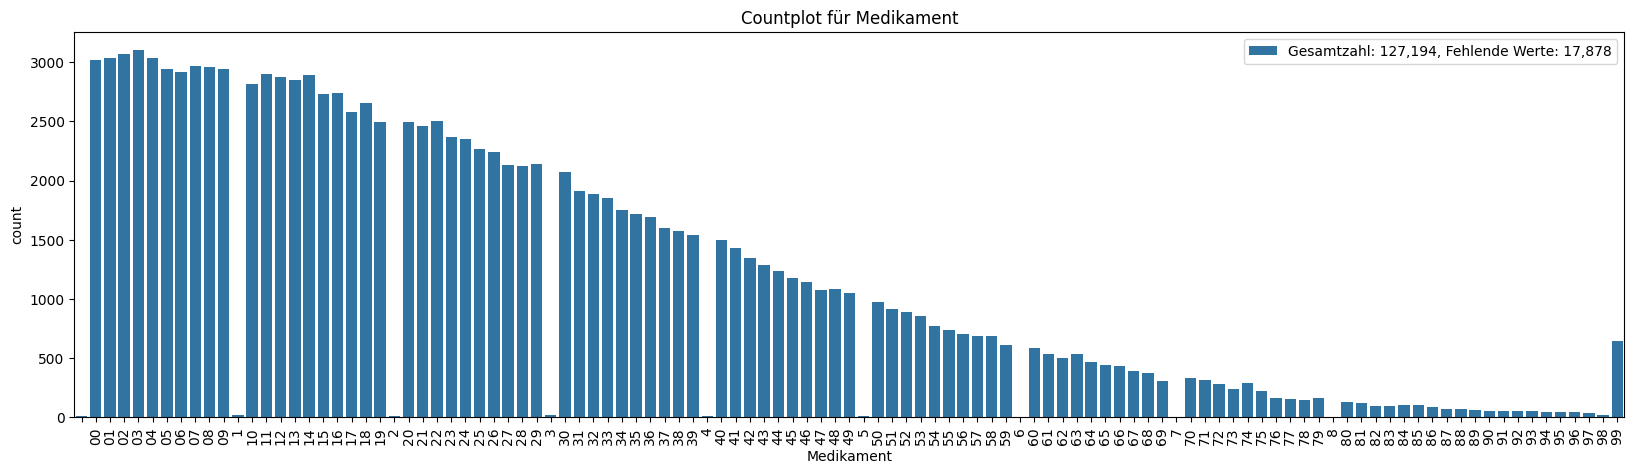

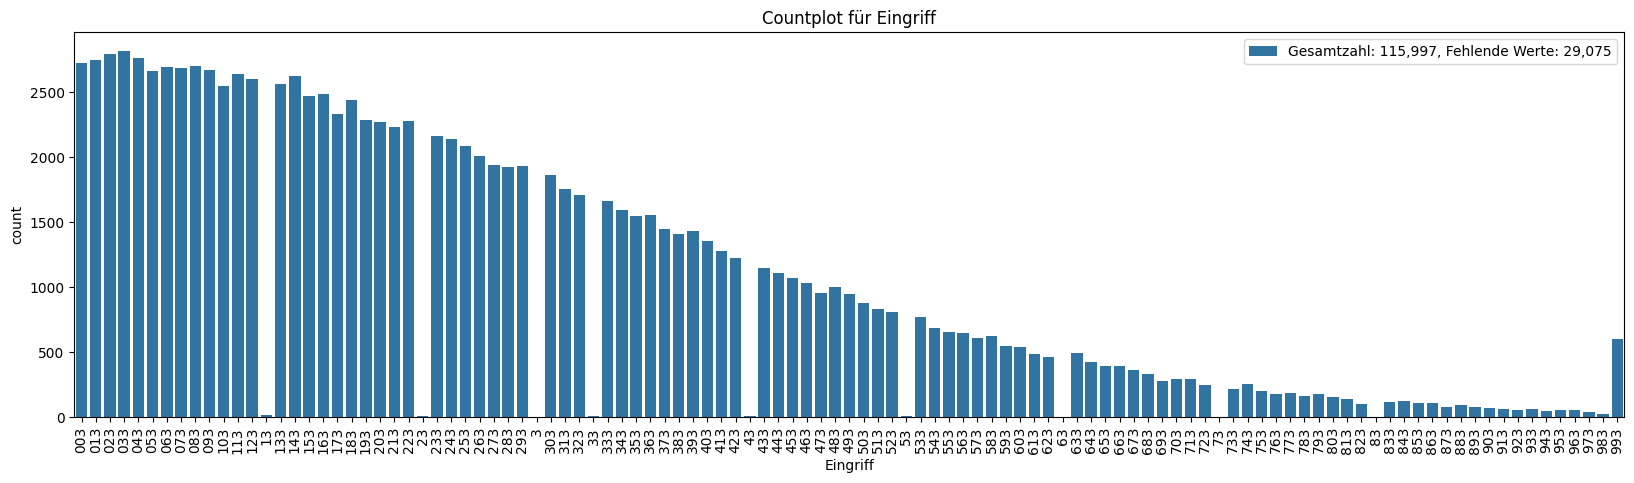

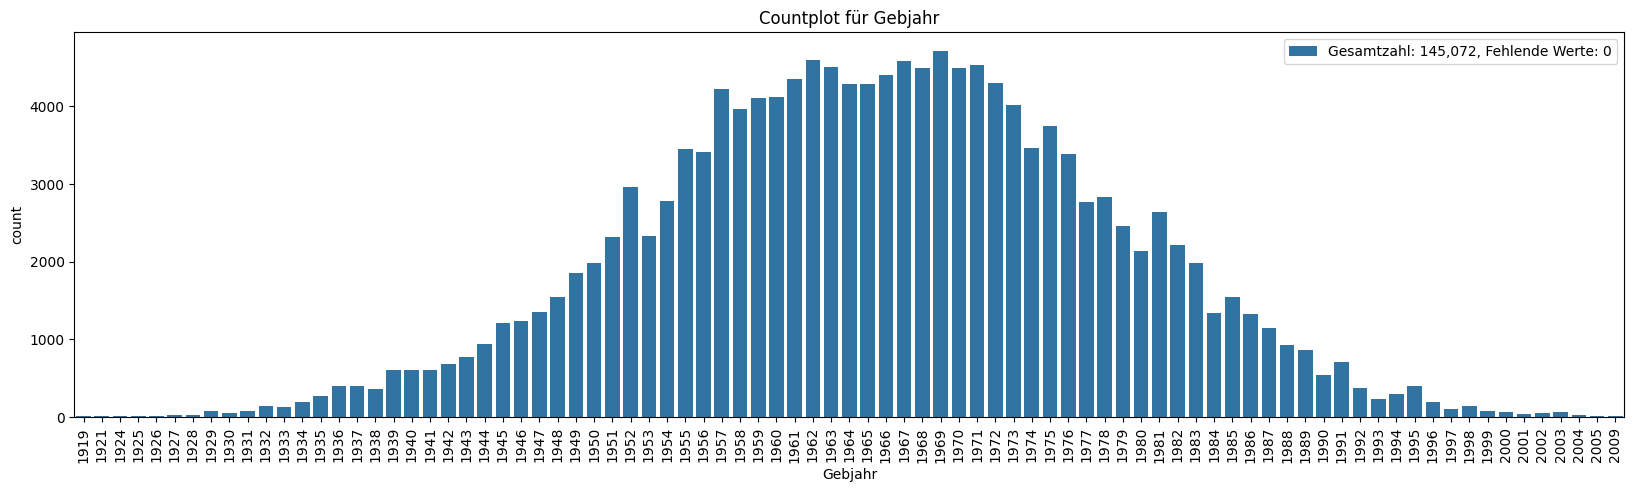

In [11]:
# Erstellen von Countplots für jede Spalte im DataFrame
for column in df.columns:
    if column in ["Versnr", "Ausgaben"]:
        continue
    plt.figure(figsize=(20, 5))
    filtered_df = df[df[column] != "Missing"]
    sorted_values = filtered_df[column].value_counts().sort_index()
    sns.countplot(data=filtered_df, x=column, order=sorted_values.index)
    total_count = filtered_df[column].count()
    nan_count = df[column].isnull().sum()
    missing_count = (df[column] == "Missing").sum()
    plt.title(f'Countplot für {column}')
    plt.xticks(rotation=90)
    plt.legend([f'Gesamtzahl: {total_count:,}, Fehlende Werte: {missing_count:,}'])
    plt.show()


# Kosten im Blick
## Diagnosen

In [12]:
diagnosen_stats = kosten_pro_diagnose(df, ['Diagnose'], ascending=False)
diagnosen_stats.head(10).sort_values(by='Durchschnittliche_Kosten_pro_Versicherten', ascending=False)

,Gesamtkosten,Anzahl_Diagnosen,Anzahl_Versicherte,Durchschnittliche_Kosten_pro_Diagnose,Durchschnittliche_Kosten_pro_Versicherten
Diagnose,,,,,
Missing,"5,242,322.84",14408,6768,363.85,774.57
97,"1,550,975.24",2863,2735,541.73,567.08
05,"1,118,955.60",3222,2768,347.29,404.25
09,"1,030,846.38",3011,2584,342.36,398.93
00,"1,071,327.01",3122,2689,343.15,398.41
03,"1,054,577.05",3122,2655,337.79,397.20
02,"1,023,790.70",3046,2630,336.11,389.27
08,"1,007,734.52",2984,2603,337.71,387.14
07,"1,009,079.30",3032,2618,332.81,385.44


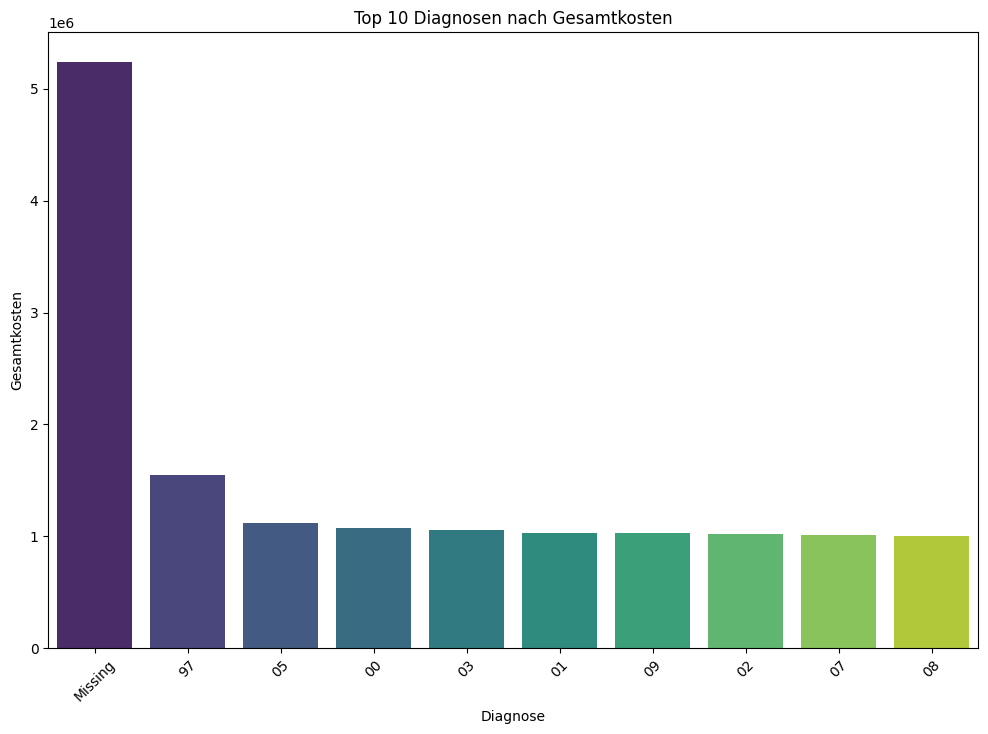

In [13]:
# Plotten der Top 10 Diagnosen basierend auf den Gesamtkosten
top_10 = diagnosen_stats.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10.index, y=top_10['Gesamtkosten'], hue=top_10.index, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Diagnosen nach Gesamtkosten')
plt.xlabel('Diagnose')
plt.ylabel('Gesamtkosten')
plt.xticks(rotation=45)
plt.show()

## Medikament

In [14]:
medikament_stats = kosten_pro_medikament(df, ['Medikament'], ascending=False)
medikament_stats.round(2).to_csv('data/medikament_stats.csv', index=False)
medikament_stats_year = kosten_pro_medikament(df, ['Jahr', 'Medikament'], ascending=False)
medikament_stats_year.head(20).sort_values(by='Jahr', ascending=False)

Gesamtkosten  Anzahl_Verschreibungen  Anzahl_Versicherte  \
Jahr Medikament                                                             
2021 Missing     1,789,957.97                    4155                4155   
     04            288,046.75                     720                 699   
     11            298,674.30                     722                 696   
     03            313,333.25                     768                 737   
     14            281,720.87                     685                 660   
     99            284,084.36                     329                 324   
     07            285,993.03                     728                 698   
     01            287,920.24                     698                 677   
     13            285,361.13                     689                 668   
     02            285,593.63                     713                 695   
     00            287,466.21                     702                 678   
2020 Missing     1,476,413.34                    4153                4153   
2019 06            298,226.15                     806                 786   
     Missing     1,671,248.89                    4596                4596   
     03            318,635.00                     820                 799   
     09            298,570.17                     775                 755   
     01            287,232.06                     800                 780   
     02            292,967.33                     759                 746   
     04            282,473.60                     775                 751   
2018 Missing     1,471,688.62                    4974                4974   

                 Durchschnittliche_Kosten_pro_Verschreibung  \
Jahr Medikament                                               
2021 Missing                                         430.80   
     04                                              400.06   
     11                                              413.68   
     03                                              407.99   
     14                                              411.27   
     99                                              863.48   
     07                                              392.85   
     01                                              412.49   
     13                                              414.17   
     02                                              400.55   
     00                                              409.50   
2020 Missing                                         355.51   
2019 06                                              370.01   
     Missing                                         363.63   
     03                                              388.58   
     09                                              385.25   
     01                                              359.04   
     02                                              385.99   
     04                                              364.48   
2018 Missing                                         295.88   

                 Durchschnittliche_Kosten_pro_Versicherten  
Jahr Medikament                                             
2021 Missing                                        430.80  
     04                                             412.08  
     11                                             429.13  
     03                                             425.15  
     14                                             426.85  
     99                                             876.80  
     07                                             409.73  
     01                                             425.29  
     13                                             427.19  
     02                                             410.93  
     00                                             423.99  
2020 Missing                                        355.51  
2019 06                                             379.42  
     Missing        

In [15]:
medikament_stats.describe()

,Gesamtkosten,Anzahl_Verschreibungen,Anzahl_Versicherte,Durchschnittliche_Kosten_pro_Verschreibung,Durchschnittliche_Kosten_pro_Versicherten
count,110.00,110.00,110.00,110.00,110.00
mean,"477,318.91","1,318.84","1,111.87",366.60,392.60
std,"685,362.84","1,924.98","1,138.23",65.39,80.67
min,646.83,1.00,1.00,161.81,161.81
25%,"45,046.20",133.50,131.25,350.31,382.52
50%,"334,462.90",812.00,778.00,361.75,396.75
75%,"802,092.52","2,216.25","1,998.25",384.60,406.75
max,"6,409,308.82","17,878.00","7,794.00",796.07,844.44


In [16]:
highest_avg_cost_per_prescription = medikament_stats_year['Durchschnittliche_Kosten_pro_Verschreibung'].idxmax()
highest_avg_cost_per_prescription, medikament_stats_year.loc[highest_avg_cost_per_prescription]

((np.int64(2021), '99'),
 Gesamtkosten                                 284,084.36
 Anzahl_Verschreibungen                           329.00
 Anzahl_Versicherte                               324.00
 Durchschnittliche_Kosten_pro_Verschreibung       863.48
 Durchschnittliche_Kosten_pro_Versicherten        876.80
 Name: (2021, 99), dtype: float64)

Beobachtungen:
- Das Medikament ATC-03 steigt zwischen den Jahren 2019 und 2021 um fast 30 € im Preis. Hier sollte man einen Blick drauf haben.

Allgemeine Kostentrends:
- Die Gesamtkosten variieren erheblich von 650 - 1,1 Mio €.
- Die Durchschnittliche_Kosten_pro_Verschreibung variieren erheblich, von etwa 160 € bis zu 800 €, was auf signifikante Unterschiede in den Verschreibungsmustern oder den Medikamentenpreisen hindeutet.

Kostenintensive Behandlungen:
- Die höchsten durchschnittlichen Kosten pro Verschreibung betragen 863,48 €, was auf besonders teure Medikamente oder Behandlungen hinweist.
- Es gibt mehrere Fälle, in denen die durchschnittlichen Kosten pro Verschreibung über 700 € liegen, was auf spezialisierte oder hochpreisige Therapien hindeutet.

Kosteneffizienz:
- Die durchschnittlichen Kosten pro Verschreibung liegen bei etwa 360 €, was möglicherweise auf günstigere Generika oder weniger komplexe Behandlungen zurückzuführen ist.
- Es gibt eine beträchtliche Spanne zwischen den höchsten und niedrigsten Durchschnittskosten, was Raum für Kostenoptimierung suggeriert. Vielleicht Verträge abschließen?


## Eingriff

In [17]:
eingriff_stats_year = kosten_pro_eingriff(df, ['Jahr', 'Eingriff'], ascending=False)
eingriff_stats = kosten_pro_eingriff(df, ['Eingriff'], ascending=False)
eingriff_stats_year.head(10)

Gesamtkosten  Anzahl_Eingriffe  Anzahl_Versicherte  \
Jahr Eingriff                                                       
2021 Missing   2,917,709.27              6832                6832   
2019 Missing   2,766,047.17              7397                7397   
2020 Missing   2,425,947.44              6831                6831   
2018 Missing   2,366,475.33              8015                8015   
2019 033         296,608.86               765                 746   
     063         282,348.60               748                 733   
2021 033         275,390.75               687                 668   
2019 093         272,789.79               712                 696   
     023         266,777.64               700                 692   
2021 113         265,375.85               648                 631   

               Durchschnittliche_Kosten_pro_Eingriff  \
Jahr Eingriff                                          
2021 Missing                                  427.07   
2019 Missing                                  373.94   
2020 Missing                                  355.14   
2018 Missing                                  295.26   
2019 033                                      387.72   
     063                                      377.47   
2021 033                                      400.86   
2019 093                                      383.13   
     023                                      381.11   
2021 113                                      409.53   

               Durchschnittliche_Kosten_pro_Versicherten  
Jahr Eingriff                                             
2021 Missing                                      427.07  
2019 Missing                                      373.94  
2020 Missing                                      355.14  
2018 Missing                                      295.26  
2019 033                                          397.60  
     063                                          385.20  
2021 033                                          412.26  
2019 093                                          391.94  
     023                                          385.52  
2021 113                                          420.56

# Gibt es Fälle mit gleichem Eingriff und gleicher Medikation, bei denen sich die Kosten untercheiden? - Betteridges Gesetz der Überschriften - Nein

In [18]:
crosstab = pd.crosstab(df['Medikament'], df['Eingriff'])

# Filtern der Einträge, bei denen die Häufigkeit mind. 1 ist
consistent_pairs = crosstab[crosstab == 1].stack().reset_index()
consistent_pairs.columns = ['Medikament', 'Eingriff', 'Count']
consistent_pairs['Haeufigkeit'] = consistent_pairs['Count']

# Filter the entries where the Haeufigkeit is greater than 1
consistent_pairs = consistent_pairs[consistent_pairs['Count'] >= 1]

print("Medikamente, die immer mit demselben Eingriff zusammenkommen:")
consistent_pairs[['Medikament', 'Eingriff', 'Haeufigkeit']].sort_values(by='Haeufigkeit', ascending=False).head()

Medikamente, die immer mit demselben Eingriff zusammenkommen:


,Medikament,Eingriff,Haeufigkeit
0,2,Missing,1.00
1,4,Missing,1.00
2,5,Missing,1.00
3,58,993,1.00
4,62,993,1.00


In [19]:
crosstab = pd.crosstab([df['Diagnose'], df['Medikament']], df['Eingriff'])

# Filtern der Einträge, bei denen die Häufigkeit mind. 1 ist
consistent_pairs = crosstab[crosstab == 1].stack().reset_index()
consistent_pairs.columns = ['Diagnose', 'Medikament', 'Eingriff', 'Count']
consistent_pairs['Haeufigkeit'] = consistent_pairs['Count']

# Filter the entries where the Haeufigkeit is greater than 1
consistent_pairs = consistent_pairs[consistent_pairs['Count'] >= 1]

print("Diagnosen, Medikamente und Eingriffe, die immer zusammen vorkommen:")
consistent_pairs[['Diagnose', 'Medikament', 'Eingriff', 'Haeufigkeit']].sort_values(by='Haeufigkeit', ascending=False).head()

Diagnosen, Medikamente und Eingriffe, die immer zusammen vorkommen:


,Diagnose,Medikament,Eingriff,Haeufigkeit
3920,Missing,Missing,933,1.00
3904,Missing,99,783,1.00
3903,Missing,99,193,1.00
3902,Missing,98,Missing,1.00
3901,Missing,92,Missing,1.00


# Regression zur Kostenvorhersage

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
    root_mean_squared_error,
)
from sklearn.model_selection import train_test_split

# Wähle die relevanten Features und das Ziel
features = ['Diagnose', 'Medikament', 'Eingriff', 'Gebjahr']
target = 'Ausgaben'

# Entferne Zeilen mit fehlenden Werten in den relevanten Spalten
df_clean = df.dropna(subset=features + [target]).copy()

# Factorize string columns
for col in ['Diagnose', 'Medikament', 'Eingriff']:
    df_clean[col] = pd.factorize(df_clean[col])[0]

# Splitte die Daten in Trainings- und Testdaten
X = df_clean[features]
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trainiere das lineare Regressionsmodell
model = LinearRegression()
model.fit(X_train, y_train)

# Mache Vorhersagen auf den Testdaten
y_pred = model.predict(X_test)

# Berechne die Metriken
mse = root_mean_squared_error(y_test, y_pred)  # squared=False returns RMSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Root Mean Squared Error: {mse:.2f} €')

Root Mean Squared Error: 325.88 €
